### Principal Component Analysis

## Reviews Preparation for Natural Language Processing

Add review_scores_rating from listings data to reviews data. Listings data only has review scores pertaining to the most recent review for a particular listing. This means that there will be many reviews that do not have a score, which we will remove during the merge.

In [1]:
#Read in libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Increase number of columns and rows displayed by Pandas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)

#Ignore warnings
import warnings; warnings.simplefilter('ignore')

In [4]:
#Set path to listings and review data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\02_Intermediate/'

In [5]:
#Parse in listings dates
date = ['calendar_last_scraped', 'calendar_updated', 'first_review' ,'host_since', 'last_review']

#Read in Airbnb Listings Data
listings = pd.read_csv(path + '01_04_2020_Listings_Cleaned.csv',parse_dates=date, index_col=0, low_memory=True, sep=',')

#Read in Airbnb Calendar and Reviews data
reviews = pd.read_csv(path + '01_04_2020_Reviews_Cleaned.csv', sep = ',',
                       parse_dates=['date'], low_memory=True,index_col=0)

In [6]:
#Preview listings
listings.head()

,accommodates,amenities,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,is_location_exact,jurisdiction_names,last_review,latitude,longitude,market,maximum_maximum_nights,name,neighborhood_overview,neighbourhood_cleansed,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,space,summary,transit,zipcode,weekly_price,monthly_price
0,3,TV Cable TV Internet Wifi Kitchen Pets liv...,0,77,1.0,Real Bed,1.0,2.0,1,0.0,0.0,2019-04-03,NaT,moderate,San Francisco,100.0,New update: the house next door is under const...,25.0,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,True,1169,True,True,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,100.0,within an hour,2008-07-31,email phone facebook reviews kba,* No Pets - even visiting guests for a short t...,958,True,True,"{""SAN FRANCISCO""}",2019-03-16,37.76931,-122.43386,San Francisco,30.0,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,183,51.0,170.0,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.55,Entire home/apt,2.019040e+13,100.0,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,94117.0,1120.0,4200.0
1,5,Internet Wifi Kitchen Heating Family/kid fri...,0,0,1.0,Real Bed,2.0,3.0,1,0.0,0.0,2019-04-03,NaT,strict_14_with_grace_period,San Francisco,100.0,We live in a large Victorian house on a quiet ...,0.0,2009-05-03,2,Philip: English transplant to the Bay Area and...,True,8904,True,False,2.0,"San Francisco, California, United States",Philip And Tania,Bernal Heights,80.0,within a day,2009-03-02,email phone reviews kba work_ema...,"Please respect the house, the art work, the fu...",5858,False,True,"{""SAN FRANCISCO""}",2017-08-06,37.74511,-122.42102,San Francisco,60.0,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,111,0.0,235.0,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,98.0,9.0,0.92,Entire home/apt,2.019040e+13,NaN,We live in a large Victorian house on a quiet ...,NaN,The train is two blocks away and you can stop ...,94110.0,1600.0,5500.0
2,2,TV Internet Wifi Kitchen Free street parking...,30,365,4.0,Real Bed,1.0,1.0,9,9.0,0.0,2019-04-03,NaT,strict_14_with_grace_period,San Francisco,50.0,Nice and good public transportation. 7 minute...,12.0,2009-08-31,1,7 minutes walk to UCSF. 15 minutes walk to US...,True,21994,True,False,10.0,"San Francisco, California, United States",Aaron,Cole Valley,100.0,within a few hours,2009-06-17,email phone reviews jumio govern...,"No party, No smoking, not for any kinds of smo...",7918,False,True,"{""SAN FRANCISCO""}",2016-11-21,37.76669,-122.45250,San Francisco,60.0,A Friendly Room - UCSF/USF - San Francisco,"Shopping old town, restaurants, McDonald, Whol...",Haight Ashbury,17,0.0,65.0,Apartment,False,False,True,8.0,9.0,8.0,9.0,9.0,85.0,8.0,0.15,Private room,2.019040e+13,200.0,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,N Juda Muni and bus stop. Street parking.,94117.0,485.0,1685.0
3,2,TV Internet Wifi Kitchen Free street parking...,30,365,4.0,Real Bed,1.0,1.0

In [7]:
#Check reviews data
reviews.dtypes

comments                 object
date             datetime64[ns]
id                        int64
listing_id                int64
reviewer_id               int64
reviewer_name            object
dtype: object

**Merge review_scores_rating from listings to corresponding reviews**

In [8]:
#Merge Review scores from listings to reviews dataframe. Merge on last review to confirm scores are assigned to proper review
review_scores = reviews.merge(listings.loc[:,['last_review','id','review_scores_rating']], left_on= ['listing_id', 'date'], 
                              right_on=['id', 'last_review'], suffixes=('_review', '_listings'))

#View review_scores shape
print('Data shape:', review_scores.shape)

#Check
review_scores.head(10)

Data shape: (68744, 9)


,comments,date,id_review,listing_id,reviewer_id,reviewer_name,last_review,id_listings,review_scores_rating
0,gracious hosts beautiful apartment out...,2018-11-12,348116418,1989997,55483280,Michael,2018-11-12,1989997,98.0
1,Ruths lovely apartment is conveniently locat...,2013-10-14,8060644,1657512,289650,Selena,2013-10-14,1657512,86.0
2,Great hosts Cool location Sparkling clean ...,2019-11-22,567541237,34181981,14454231,Kirk,2019-11-22,34181981,100.0
3,I booked the place for my friends who are a n...,2018-12-23,361512912,17237462,1254338,Shawn,2018-12-23,17237462,91.0
4,If youre staying for 12 days Maybe you can ha...,2019-04-06,433520140,13333814,102616701,Mohammad,2019-04-06,13333814,77.0
5,Katherine was quick with the responses There ...,2018-12-23,361565686,20149972,62560730,Julia,2018-12-23,20149972,100.0
6,The bathroom is nasty It smells really bad us...,2019-03-13,423315217,16071674,241155881,Christabel,2019-03-13,16071674,77.0
7,The location is amazing its in the heart of U...,2017-05-04,149503136,1483853,66959771,Mahalath,2017-05-04,1483853,95.0
8,The location is amazing its in the heart of U...,2017-05-04,149503136,1483853,66959771,Mahalath,2017-05-04,1483853,95.0
9,The location is amazing its in the heart of U...,2017-05-04,149503136,1483853,66959771,Mahalath,2017-05-04,1483853,95.0


### Quick clean up for NLP

In [9]:
#View missing values in review_scores
print('\nMissing values:\n', review_scores.isna().sum())


Missing values:
 comments                  0
date                      0
id_review                 0
listing_id                0
reviewer_id               0
reviewer_name             0
last_review               0
id_listings               0
review_scores_rating    469
dtype: int64


In [10]:
#Remove rows with missing review_scores_rating
review_scores = review_scores[-review_scores.review_scores_rating.isna()]

#Drop unnecessary columns from review_scores
review_scores.drop(columns=['last_review', 'id_listings'], axis = 1, inplace= True)

#Rename columns
review_scores.rename(columns={'review_scores_rating':'score'}, inplace=True)

#Drop duplicate values
review_scores.drop_duplicates(inplace=True)

In [22]:
#View updated reviews shape and missing values
print('Updated reviews data shape:',review_scores.shape)
print('Missing values: \n', review_scores.isna().sum())

Updated reviews data shape: (34923, 8)
Missing values: 
 comments         0
date             0
id_review        0
listing_id       0
reviewer_id      0
reviewer_name    0
score            0
score_labels     0
dtype: int64


In [23]:
#Check
review_scores.head()

,comments,date,id_review,listing_id,reviewer_id,reviewer_name,score,score_labels
33544,Large place with incredible views on a hill ne...,2019-10-12,545636224,631635,31409388,Kelly,95.0,Poor
2248,Alex was an excellent host Accommodated an ear...,2018-12-24,361883671,21730409,223039161,Xing Yu,91.0,Poor
8749,Communal style hotel with amazing atmosphere a...,2019-09-02,522885590,21026079,290200471,Seth,91.0,Poor
2249,Alex was on hand most of the time to lend a he...,2019-01-12,400648246,21727562,233587414,Nisha,94.0,Poor
62650,We didnt see Jane and Michael but everything w...,2019-04-28,445142800,28074227,168903928,Martin,95.0,Poor


Text(0.5, 0, 'Scores')

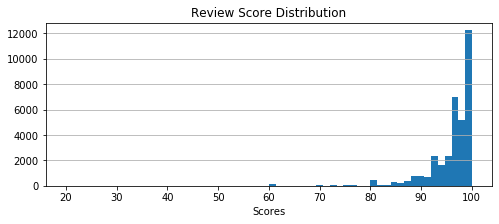

In [12]:
#View scores distribution
ax = review_scores.score.hist(bins = 60, figsize=(8,3), grid = False)

#Mute yaxis gridlines
ax.grid(axis='y')

#Set labels
ax.set_title('Review Score Distribution')
ax.set_xlabel('Scores')

# Text Analysis

Some questions to explore:
- What are the topics of negative reviews vs positive reviews?
- Does greater word usage correlate positively with a more negative experience?
- How would you advise first time hosts to increase the liklihood of a positive review?


Split data into training and test sets

In [13]:
#Binning scores
review_scores.score.describe()

count    34923.000000
mean        95.974315
std          5.529684
min         20.000000
25%         95.000000
50%         97.000000
75%         99.000000
max        100.000000
Name: score, dtype: float64

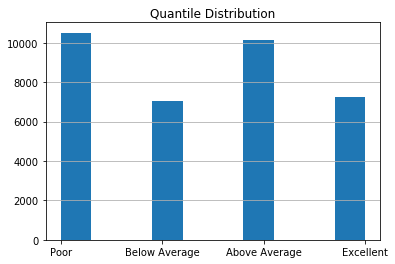

In [21]:
#Create score_labels based on quartile review_scores is in
review_scores['score_labels'] = pd.qcut(review_scores['score'], q=4, labels=['Poor', 'Below Average','Above Average', 'Excellent'])

#Sort rows
review_scores.sort_values(by='score_labels',inplace=True)

#Plot
ax = review_scores.score_labels.hist()

#Set plot aesthetics
ax.set_title('Quantile Distribution')
ax.grid(axis = 'x', which='major')


In [ ]:
# #Convert comments and review_rating into arrays
# X = review_scores['comments'].values #training data
# y = review_scores['score_labels'].values #target data

# #Check
# print(X.shape)
# print(y.shape)

In [ ]:
# #instantiate test_train_split
# from sklearn.model_selection import train_test_split

# #Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# #Check 
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(X_train)

Tokenize comments

In [ ]:
# #Summon CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

# #Instantiate CountVectorizer
# vect = CountVectorizer()

# #fit to training data
# vect = vect.fit(X_train)

# #Transform
# X_train_transformed = vect.transform(X_train)

In [ ]:
# #View representation of X_train_transformed
# print('X_train_transformed representation: {}'.format(repr(X_train_transformed)))

# #Capture information about features
# feature_names = vect.get_feature_names()
# print('Number of features: {:,} '.format(len(feature_names)))
# print('\nEvery 2000th features: {}'.format(feature_names[::200]))

Naive implementation of SVR using 

In [ ]:
# #Normalize word count matrix
# from sklearn.feature_extraction.text import TfidfVectorizer 

# #reduce the dimensionality to retain the first N components which capture the major variance
# from sklearn.decomposition import TruncatedSVD 

# from sklearn.svm import SVR

# #Summon Pipeline
# from sklearn.pipeline import Pipeline

# #Instantiate pipeline
# pipeline = Pipeline(steps=[('tfidf', TfidfVectorizer()), 
#                            ('svd', TruncatedSVD(random_state=42)), 
#                            ('clf', SVR())])
# #Check
# print(pipeline)

Pipeline Optimization

In [ ]:
# #Summon RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# #Set Param grid for RandomizedSearchCV to explore
# param_grid= {'tfidf__max_df':(.5,.75, 1.0),
#              'svd__n_components': (50, 100, 150, 200),
#              'clf__C':(.1,1,10)}

# #Instantiate model
# random_search = RandomizedSearchCV(estimator=pipeline,param_distributions=param_grid,
#                             verbose=10, n_jobs=-1, scoring = 'r2')
# #Score
# random_search.fit(X_train, y_train)

In [ ]:
# #View average score
# print("Best score: {:.3f}".format(random_search.best_score_))
# print("Best parameters set:")
# best_parameters = random_search.best_estimator_.get_params()


In [ ]:
#test using regression

# Machine Learning

Is there value in capturing the numeric counts of amenities per listing? See below

In [ ]:
# #Split strings on commas into features
# df.amenities=df.amenities.str.split(pat=',', expand = False)

# #Create amenities count and assign to df
# df['amenities_count'] = df['amenities'].str.len()